In [1]:
# Import thư viện và đọc dữ liệu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

df = pd.read_excel('Rice2024.xlsx', engine='openpyxl')
df = pd.DataFrame(df)

print(df.head())

   Id Nickname Class   Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  \
0   1       R1     C  15231  525.578979         229.749878          85.093788   
1   2       R2     C  14656  494.311005         206.020065          91.730972   
2   3       R3     C  14634  501.122009         214.106781          87.768288   
3   4       R4     C  13176  458.342987         193.337387          87.448395   
4   5       R5     C  14688  507.166992         211.743378          89.312454   

   Eccentricity  Convex_Area    Extent  
0      0.928882      15617.0  0.572896  
1      0.895405      15072.0  0.615436  
2      0.912118      14954.0  0.693259  
3      0.891861      13368.0  0.640669  
4      0.906691      15262.0  0.646024  


In [2]:
# Xóa cột ‘Id’ và ‘Nickname’ Xóa cột ‘Id’ và ‘Nickname’
df = df.drop(['Id', 'Nickname'], axis=1)
print(df.head())

  Class   Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  \
0     C  15231  525.578979         229.749878          85.093788   
1     C  14656  494.311005         206.020065          91.730972   
2     C  14634  501.122009         214.106781          87.768288   
3     C  13176  458.342987         193.337387          87.448395   
4     C  14688  507.166992         211.743378          89.312454   

   Eccentricity  Convex_Area    Extent  
0      0.928882      15617.0  0.572896  
1      0.895405      15072.0  0.615436  
2      0.912118      14954.0  0.693259  
3      0.891861      13368.0  0.640669  
4      0.906691      15262.0  0.646024  


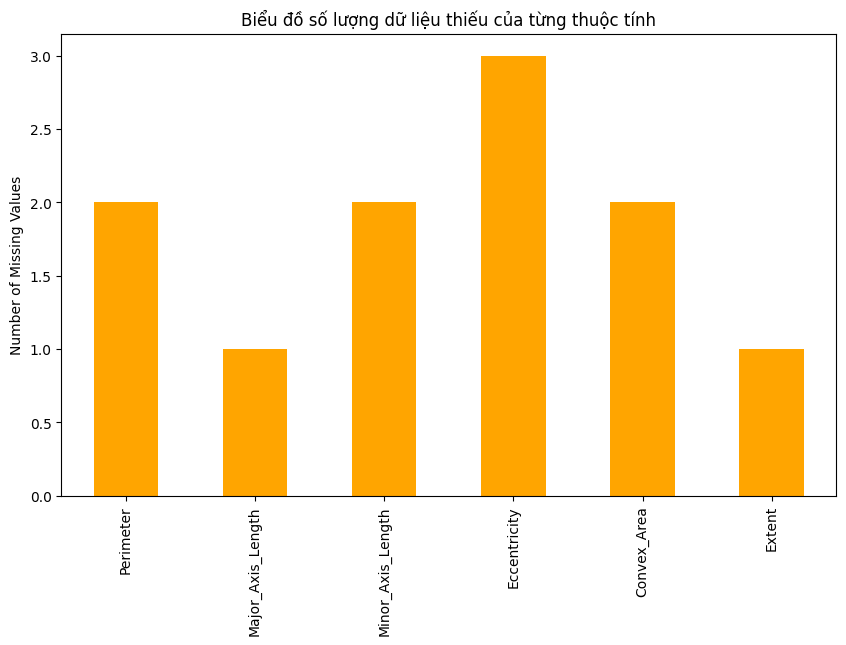

Đã xóa các hàng bị thiếu dữ liệu.


In [3]:
# Xóa các hàng có dữ liệu thiếu
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='orange')
plt.title('Biểu đồ số lượng dữ liệu thiếu của từng thuộc tính')
plt.ylabel('Number of Missing Values')
plt.show()
df = df.dropna()
print("Đã xóa các hàng bị thiếu dữ liệu.")

In [4]:
# xóa hàng 429,,,,0830078125
print("Xóa hàng Perimeter = 429,,,,0830078125")
df = df[df['Perimeter'] != '429,,,,0830078125']

Xóa hàng Perimeter = 429,,,,0830078125


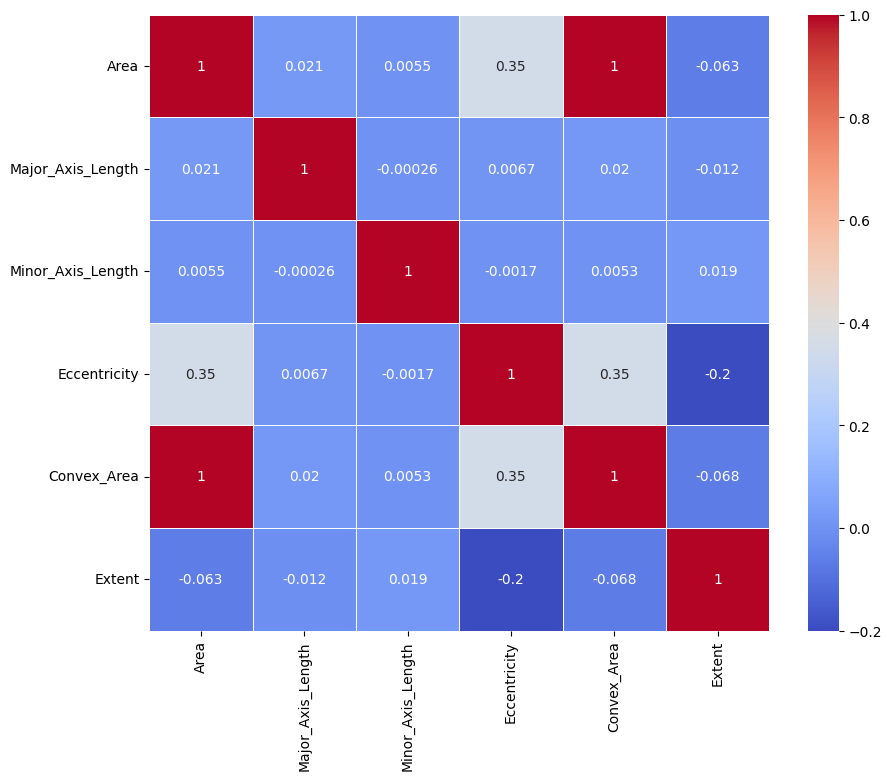

Do cột Area và Convex_Area tương đương với nhau nên xóa cột Convex_Area
Đã xóa cột Convex_Area


In [5]:
# Vẽ ma trận tương quan và xóa cột k cần thiết
numeric_df = df.select_dtypes(include=[np.number])
# Tính toán ma trận tương quan chỉ với các cột dạng số
corr_matrix = numeric_df.corr()
# Vẽ heatmap của ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

print("Do cột Area và Convex_Area tương đương với nhau nên xóa cột Convex_Area")
df = df.drop('Convex_Area', axis=1)
print("Đã xóa cột Convex_Area")

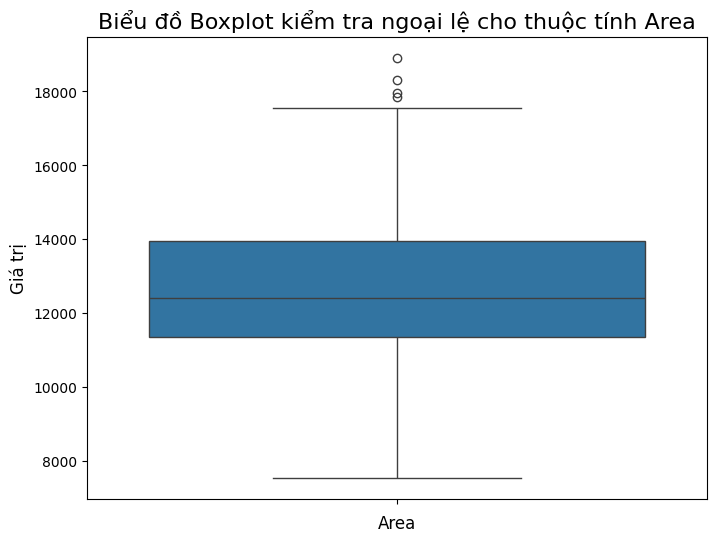

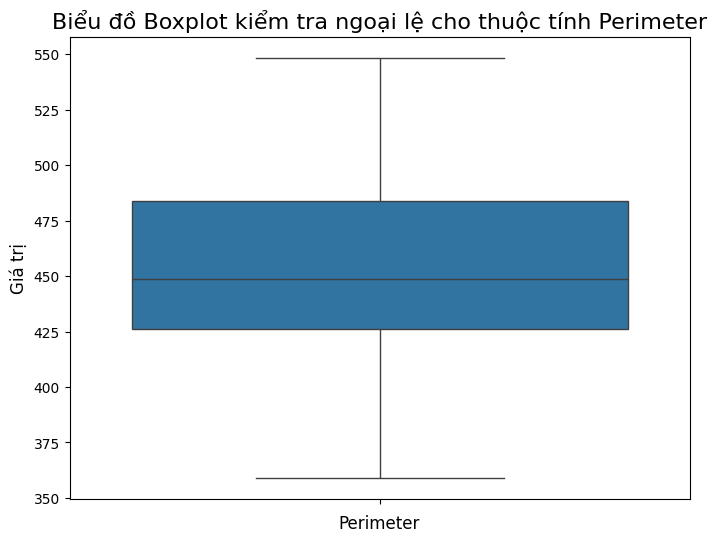

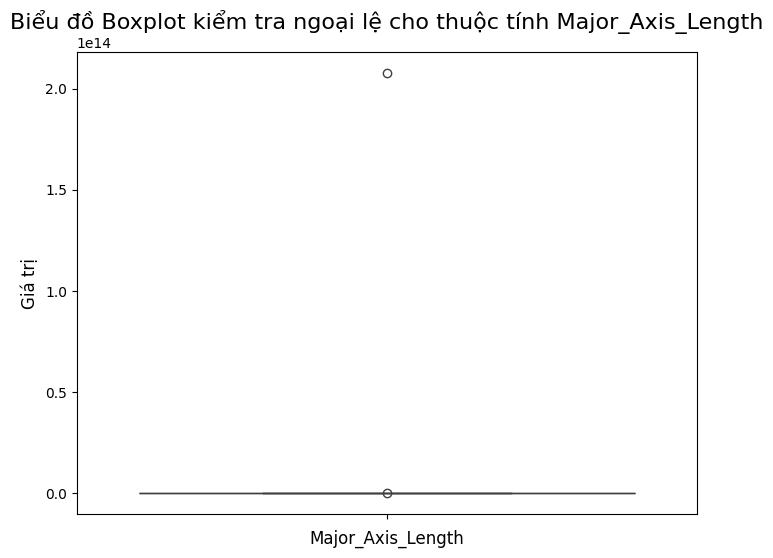

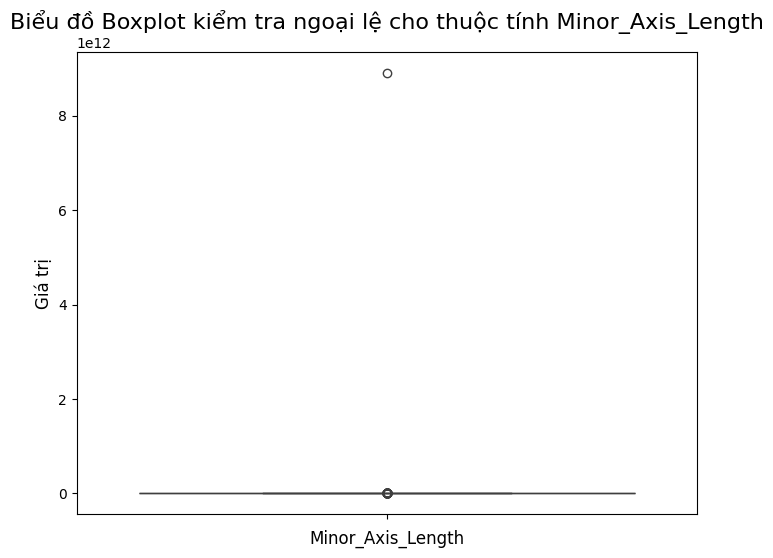

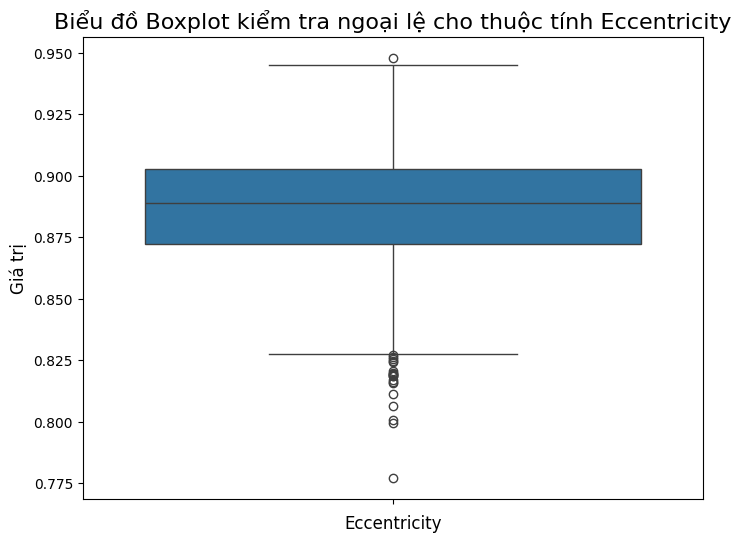

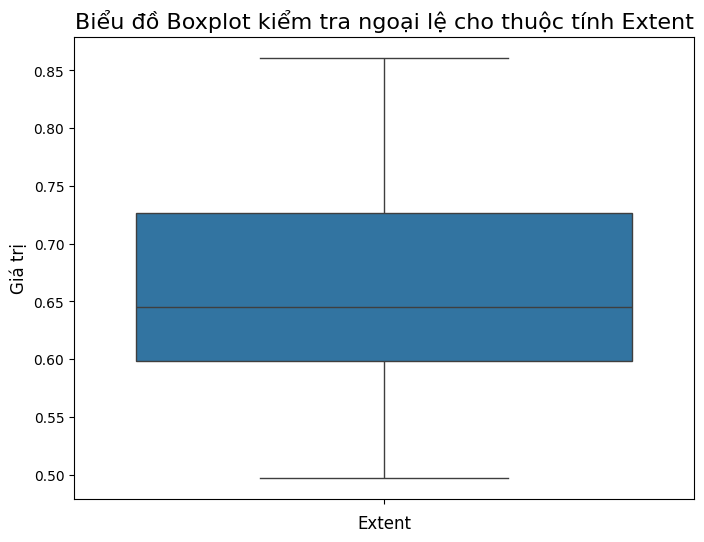

In [6]:
# Vẽ boxplot cho từng thuộc tính
for column in df.columns:
    if column != 'Id' and column != 'Class':  # Loại bỏ cột 'id' nếu cột này tồn tại
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df[column])  # Vẽ boxplot cho thuộc tính cụ thể
        plt.title(
            f'Biểu đồ Boxplot kiểm tra ngoại lệ cho thuộc tính {column}', fontsize=16)
        plt.xlabel(f'{column}', fontsize=12)
        plt.ylabel('Giá trị', fontsize=12)
        plt.show()
    

Các điểm dữ liệu bị phát hiện là ngoại lệ:
   Class   Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  \
49     C  14911  494.088989       2.075602e+14          92.410606   

    Eccentricity    Extent  
49       0.89542  0.604762  


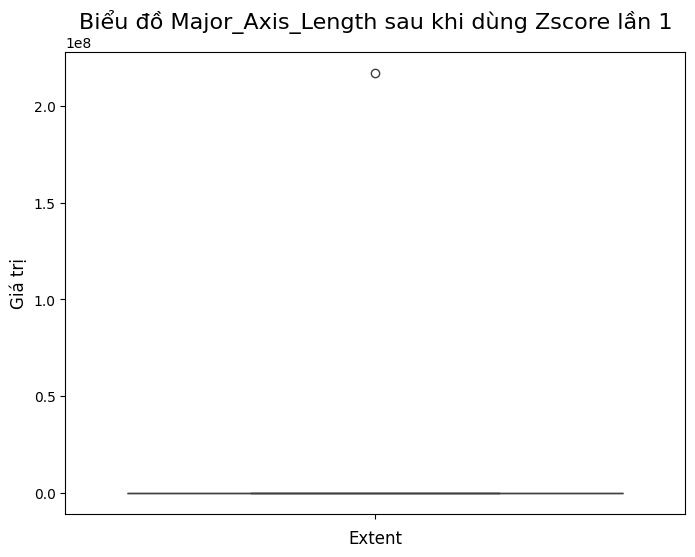

Các điểm dữ liệu bị phát hiện là ngoại lệ:
    Class   Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  \
235     C  16226  517.684021        217080566.0          95.938377   

     Eccentricity    Extent  
235      0.897041  0.583145  


C:\Users\MINH TAI\AppData\Local\Temp\ipykernel_12592\1991960313.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_Major1[attr] = pd.to_numeric(df_cleaned_Major1[attr], errors='coerce')


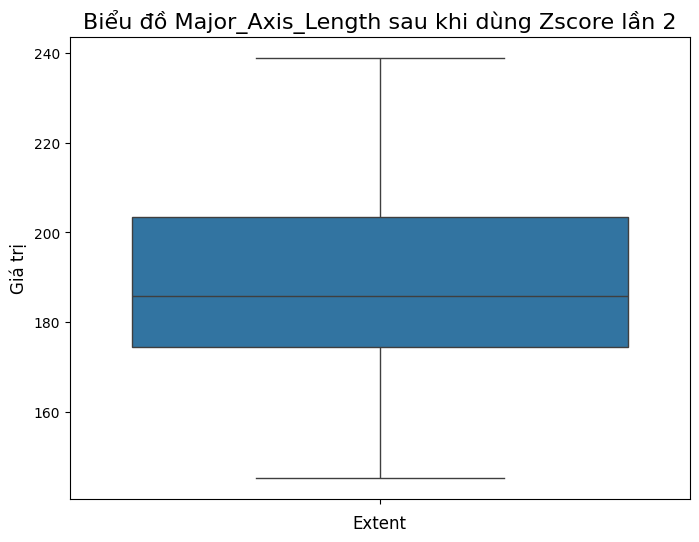

In [7]:
# Xử lý dữ liệu nhiễu cột Major_Axis_Length bằng thuật toán Zscore0

attribute = ['Major_Axis_Length']

# Chuyển đổi kiểu dữ liệu các cột thuộc tính thành số (nếu cần)
for attr in attribute:
    df[attr] = pd.to_numeric(df[attr], errors='coerce')

# Tính Z-score cho tất cả các thuộc tính số
z_scores = np.abs(stats.zscore(df[attribute]))

# Xác định các điểm dữ liệu với Z-score lớn hơn 3
outliers = (z_scores > 3).any(axis=1)
# Hiển thị các hàng bị phát hiện là ngoại lệ
outliers_data = df[outliers]
print("Các điểm dữ liệu bị phát hiện là ngoại lệ:")
print(outliers_data)

# Xóa các điểm dữ liệu ngoại lệ
df_cleaned_Major1 = df[~outliers]

# Vẽ boxplot cho thuộc tính cụ thể
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned_Major1['Major_Axis_Length'])
plt.title(
    f'Biểu đồ Major_Axis_Length sau khi dùng Zscore lần 1', fontsize=16)
plt.xlabel(f'{column}', fontsize=12)
plt.ylabel('Giá trị', fontsize=12)
plt.show()

#_________________________

# Chuyển đổi kiểu dữ liệu các cột thuộc tính thành số (nếu cần)
for attr in attribute:
    df_cleaned_Major1[attr] = pd.to_numeric(df_cleaned_Major1[attr], errors='coerce')

# Tính Z-score cho tất cả các thuộc tính số
z_scores = np.abs(stats.zscore(df_cleaned_Major1[attribute]))

# Xác định các điểm dữ liệu với Z-score lớn hơn 3
outliers = (z_scores > 3).any(axis=1)
# Hiển thị các hàng bị phát hiện là ngoại lệ
outliers_data = df_cleaned_Major1[outliers]
print("Các điểm dữ liệu bị phát hiện là ngoại lệ:")
print(outliers_data)

# Xóa các điểm dữ liệu ngoại lệ
df_cleaned_Major2 = df_cleaned_Major1[~outliers]

# Vẽ boxplot cho thuộc tính cụ thể
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned_Major2['Major_Axis_Length'])
plt.title(
    f'Biểu đồ Major_Axis_Length sau khi dùng Zscore lần 2', fontsize=16)
plt.xlabel(f'{column}', fontsize=12)
plt.ylabel('Giá trị', fontsize=12)
plt.show()

Các điểm dữ liệu bị phát hiện là ngoại lệ:
   Class   Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  \
98     C  13251  460.532013         190.916306       8.899756e+12   

    Eccentricity    Extent  
98        0.8847  0.749915  


C:\Users\MINH TAI\AppData\Local\Temp\ipykernel_12592\2072098678.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_Major2[attr] = pd.to_numeric(df_cleaned_Major2[attr], errors='coerce')


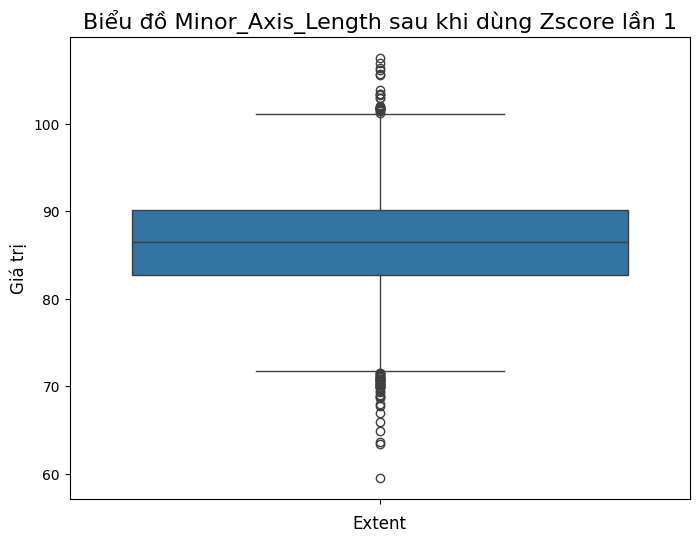

In [8]:
# Xử lý dữ liệu nhiễu cột Major_Axis_Length bằng thuật toán Zscore0

attribute = ['Minor_Axis_Length']

# Chuyển đổi kiểu dữ liệu các cột thuộc tính thành số (nếu cần)
for attr in attribute:
    df_cleaned_Major2[attr] = pd.to_numeric(df_cleaned_Major2[attr], errors='coerce')

# Tính Z-score cho tất cả các thuộc tính số
z_scores = np.abs(stats.zscore(df_cleaned_Major2[attribute]))

# Xác định các điểm dữ liệu với Z-score lớn hơn 3
outliers = (z_scores > 3).any(axis=1)
# Hiển thị các hàng bị phát hiện là ngoại lệ
outliers_data = df_cleaned_Major2[outliers]
print("Các điểm dữ liệu bị phát hiện là ngoại lệ:")
print(outliers_data)

# Xóa các điểm dữ liệu ngoại lệ
df_cleaned_Minor1 = df_cleaned_Major2[~outliers]

# Vẽ boxplot cho thuộc tính cụ thể
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned_Minor1['Minor_Axis_Length'])
plt.title(
    f'Biểu đồ Minor_Axis_Length sau khi dùng Zscore lần 1', fontsize=16)
plt.xlabel(f'{column}', fontsize=12)
plt.ylabel('Giá trị', fontsize=12)
plt.show()

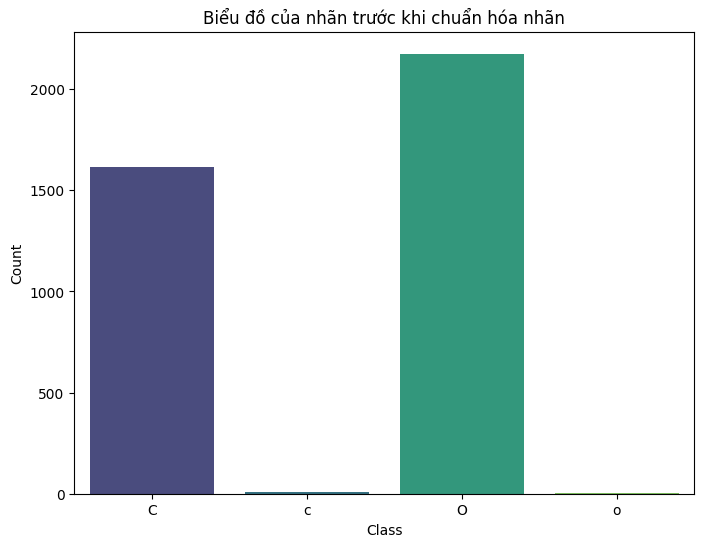

Chuẩn hóa cột nhãn: c -> C, o -> O
Label Encoding cho cột 'Class': C -> 0, O -> 1


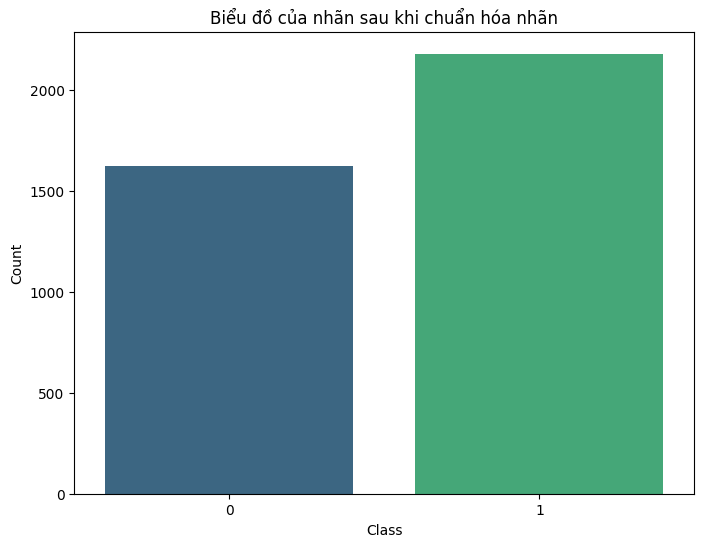

In [9]:
# Xử lý cột nhãn

plt.figure(figsize=(8, 6))
# Sử dụng bảng màu 'viridis' cho màu sắc khác nhau
sns.countplot(x='Class', data=df_cleaned_Minor1, hue='Class', palette='viridis', legend=False)
plt.title('Biểu đồ của nhãn trước khi chuẩn hóa nhãn')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

print("Chuẩn hóa cột nhãn: c -> C, o -> O")
df_cleaned_Minor1.loc[:, 'Class'] = df_cleaned_Minor1['Class'].replace({'c': 'C', 'o': 'O'})

# Thực hiện Label Encoding cho các cột 'Class'
df_cleaned_Minor1.loc[:, 'Class'] = df_cleaned_Minor1['Class'].map({'C': 0, 'O': 1})
print("Label Encoding cho cột 'Class': C -> 0, O -> 1")


# Countplot - Biểu đồ đếm số lượng mẫu giữa các lớp
plt.figure(figsize=(8, 6))
# Sử dụng bảng màu 'viridis' cho màu sắc khác nhau
sns.countplot(x='Class', data=df_cleaned_Minor1, hue='Class', palette='viridis', legend=False)
plt.title('Biểu đồ của nhãn sau khi chuẩn hóa nhãn')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [10]:
# Scale min-max
print("Dữ liệu trước khi scale:")
print(df_cleaned_Minor1.head())

scaler = MinMaxScaler(feature_range=(0, 1))
# Chọn các cột số để chuẩn hóa
columns_to_scale = ['Area', 'Perimeter',
                    'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Extent']
# Tạo một bản sao của DataFrame để chuẩn hóa
df_scaled = df_cleaned_Minor1.copy()
# Áp dụng chuẩn hóa Min-Max
df_scaled[columns_to_scale] = scaler.fit_transform(
    df_scaled[columns_to_scale])

print("Dữ liệu sau khi scale:")
print(df_scaled.head())

Dữ liệu trước khi scale:
  Class   Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  \
0     0  15231  525.578979         229.749878          85.093788   
1     0  14656  494.311005         206.020065          91.730972   
2     0  14634  501.122009         214.106781          87.768288   
3     0  13176  458.342987         193.337387          87.448395   
4     0  14688  507.166992         211.743378          89.312454   

   Eccentricity    Extent  
0      0.928882  0.572896  
1      0.895405  0.615436  
2      0.912118  0.693259  
3      0.891861  0.640669  
4      0.906691  0.646024  
Dữ liệu sau khi scale:
  Class      Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  \
0     0  0.675937   0.879232           0.901216           0.532417   
1     0  0.625330   0.714095           0.648087           0.670663   
2     0  0.623394   0.750066           0.734349           0.588124   
3     0  0.495071   0.524136           0.512800           0.581461   
4     0  0.628146   0.781

In [12]:
# Lưu dataset
name_file = 'standardized-rice.xlsx'
df.to_excel(name_file, index=False)
print(df_scaled)
print("Đã lưu standardized-rice.xlsx")


# df_scaled.to_csv('standardized-rice.csv')

     Class      Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  \
0        0  0.675937   0.879232           0.901216           0.532417   
1        0  0.625330   0.714095           0.648087           0.670663   
2        0  0.623394   0.750066           0.734349           0.588124   
3        0  0.495071   0.524136           0.512800           0.581461   
4        0  0.628146   0.781992           0.709138           0.620288   
...    ...       ...        ...                ...                ...   
3805     1  0.342369   0.299758           0.269049           0.546223   
3806     1  0.358564   0.328975           0.239480           0.623415   
3807     1  0.430030   0.440458           0.408641           0.567997   
3808     1  0.205158   0.175325           0.169922           0.389045   
3809     1  0.341753   0.240882           0.168698           0.652692   

      Eccentricity    Extent  
0         0.888011  0.207577  
1         0.691980  0.324564  
2         0.789846  0.538576  